RMS Acceleration - No Control: 0.795 m/s²
RMS Acceleration - AI Control: 0.298 m/s²


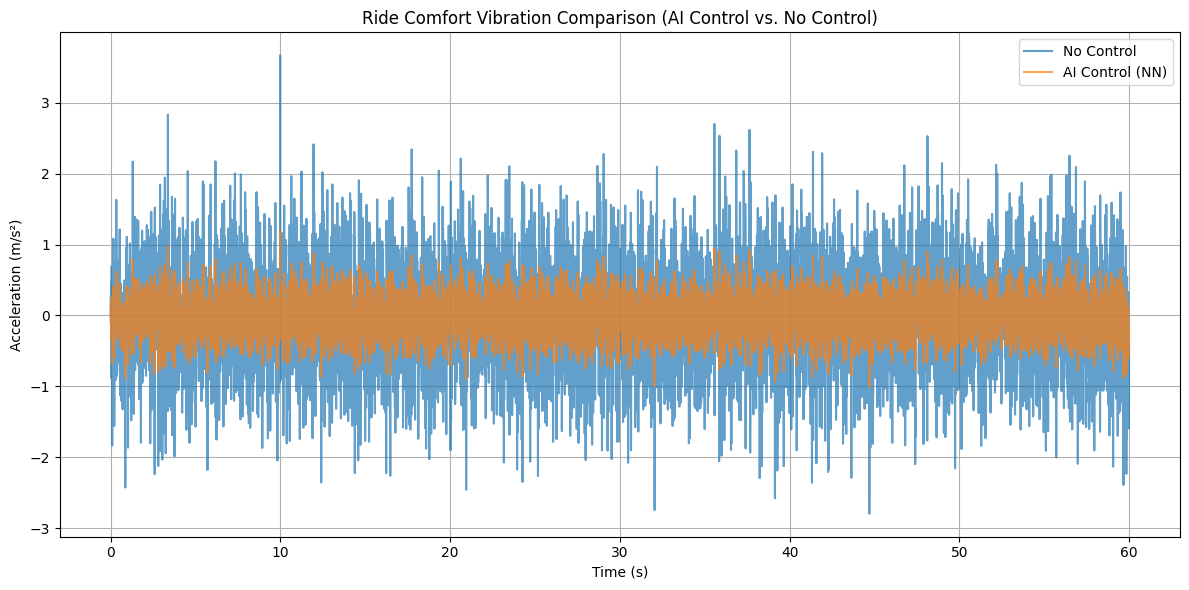

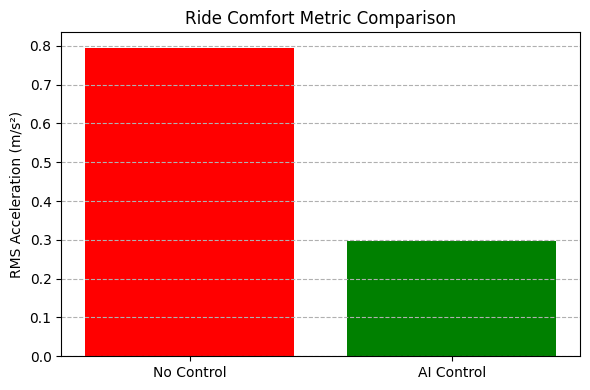

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Constants
fs = 100  # Sampling frequency (Hz)
duration = 60  # Duration in seconds
t = np.linspace(0, duration, int(duration * fs))

# Generate synthetic input vibration data (random noise)
input_vibration = np.random.normal(0, 1, len(t)).reshape(-1, 1)

# No control: Original vibration (high amplitude)
no_control_vibration = 0.8 * input_vibration.flatten()

# Training data generation (simple example with reduced vibration as target)
X_train = input_vibration
y_train = 0.3 * input_vibration.flatten()  # Target vibration after ideal AI control

# Train AI-based control model (neural network)
ai_model = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', max_iter=500, random_state=42)
ai_model.fit(X_train, y_train)

# AI control: Predict controlled vibrations
ai_control_vibration = ai_model.predict(input_vibration)

# ISO 2631-1 RMS acceleration calculation
def rms_acceleration(signal):
    return np.sqrt(np.mean(signal**2))

rms_no_control = rms_acceleration(no_control_vibration)
rms_ai_control = rms_acceleration(ai_control_vibration)

# Print RMS results
print(f"RMS Acceleration - No Control: {rms_no_control:.3f} m/s²")
print(f"RMS Acceleration - AI Control: {rms_ai_control:.3f} m/s²")

# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(t, no_control_vibration, label='No Control', alpha=0.7)
plt.plot(t, ai_control_vibration, label='AI Control (NN)', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.title('Ride Comfort Vibration Comparison (AI Control vs. No Control)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar chart comparison
plt.figure(figsize=(6, 4))
plt.bar(['No Control', 'AI Control'], [rms_no_control, rms_ai_control], color=['red', 'green'])
plt.ylabel('RMS Acceleration (m/s²)')
plt.title('Ride Comfort Metric Comparison')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()
